# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Dataset 1

In [2]:
#Reading the dataset

df = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/Thecleverprogrammer.csv')
print(df.head())

         Date  Views
0  01/06/2021   7831
1  02/06/2021   7798
2  03/06/2021   7401
3  04/06/2021   7054
4  05/06/2021   7973


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    391 non-null    object
 1   Views   391 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.2+ KB


In [4]:
#Convert the date column into datetime data type
df["Date"] = pd.to_datetime(df["Date"],format="%d/%m/%Y")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


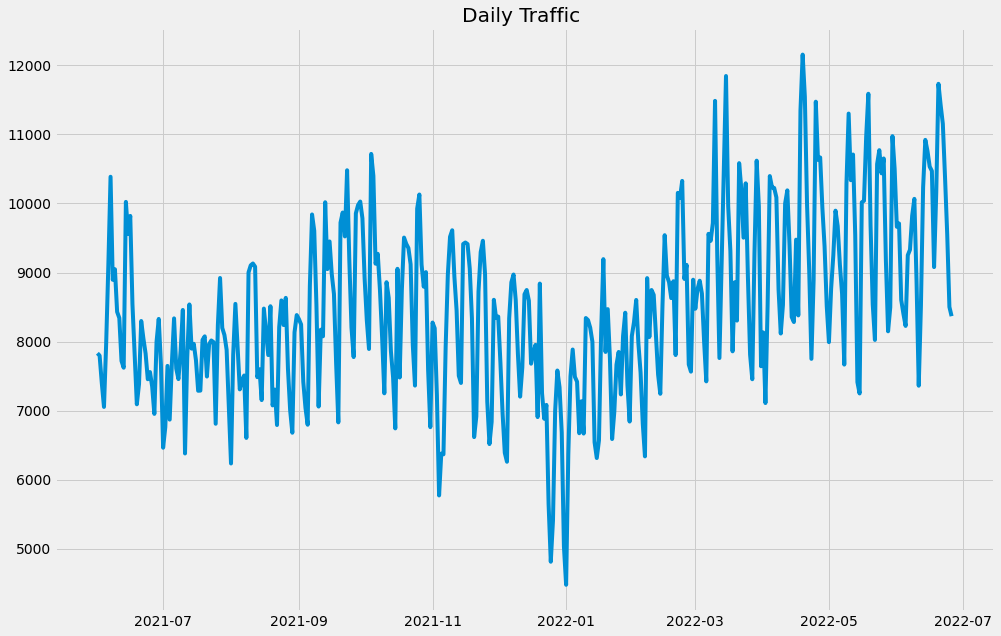

In [5]:
#Plotting the daily traffic 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
plt.plot(df["Date"], df["Views"])
plt.title("Daily Traffic ")
plt.show()

<Figure size 432x288 with 0 Axes>

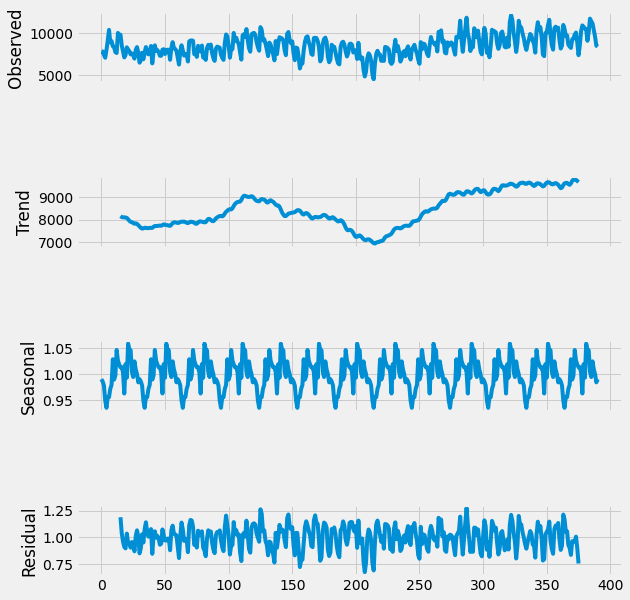

In [6]:
#Find whether the data is stationary or seasonal

result = seasonal_decompose(df["Views"],model='multiplicative',freq=30)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(10,10)

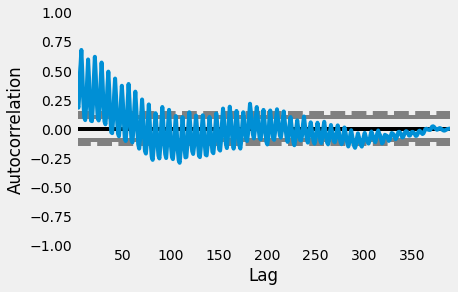

In [7]:
#Using the seasonal ARIMA to forecase traffic

#d = 1 since the data is not stationary
#p = 5
#q = 2

pd.plotting.autocorrelation_plot(df["Views"])

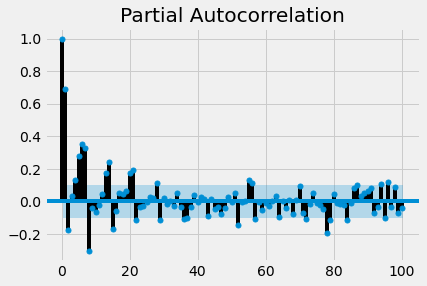

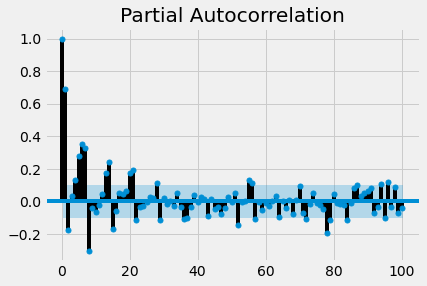

In [8]:
plot_pacf(df['Views'],lags=100)

In [9]:
#Train the SARIMA model

p,d,q = 5,1,2
model = sm.tsa.statespace.SARIMAX(df.Views,order=(p,d,q),seasonal_order=(p,d,q,12))
model = model.fit()
print(model.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.037
Date:                            Wed, 17 Aug 2022   AIC                           6228.074
Time:                                    06:48:16   BIC                           6287.098
Sample:                                         0   HQIC                          6251.500
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7618      0.130      5.851      0.000       0.507       1.017
ar.L2         -0.7747      0.134   

In [10]:
predictions = model.predict(len(df),len(df)+50)
print(predictions)

391     9931.551501
392    10807.648332
393    10771.689353
394     9860.933732
395     8779.792839
396     8269.999135
397     8980.730840
398     9745.745006
399    10313.713212
400    10639.480713
401     9857.452780
402     9287.488139
403     8995.247268
404     9111.884197
405    10551.930826
406    11013.684618
407    10909.073996
408    10051.521781
409     9375.300270
410     8605.093492
411     9217.694204
412    10403.764003
413    10624.626644
414    10780.206772
415    10220.979739
416     9365.437524
417     8982.721418
418     9187.640203
419     9937.452503
420    10271.659348
421    10724.758046
422     9849.615205
423     9441.683042
424     9008.731264
425     8885.071283
426    10212.114644
427    10896.323425
428    10908.260571
429    10348.348242
430     9371.008628
431     8691.109680
432     8784.594232
433    10139.413880
434    10576.982871
435    10862.557303
436    10399.692412
437     9241.623986
438     9129.293117
439     9396.220479
440    10366.355328


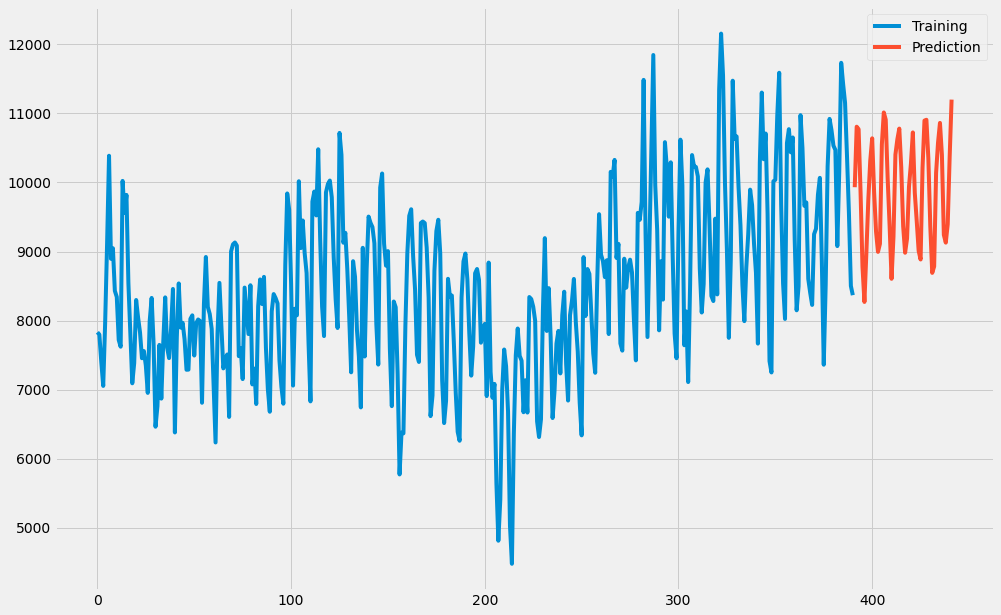

In [11]:
df["Views"].plot(legend=True, label="Training", figsize=(15,10))
predictions.plot(legend=True, label="Prediction")

# Dataset 2

In [12]:
data = pd.read_csv('https://github.com/prathyuma-08/OnboardingAppUI/files/9331501/website-traffic.csv')
print(data.head())

   DayOfWeek MonthDay  Year  Visits
0     Monday   June 1  2009      27
1    Tuesday   June 2  2009      31
2  Wednesday   June 3  2009      38
3   Thursday   June 4  2009      38
4     Friday   June 5  2009      31


In [13]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   DayOfWeek  214 non-null    object
 1   MonthDay   214 non-null    object
 2   Year       214 non-null    int64 
 3   Visits     214 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 6.8+ KB
None


In [22]:
data[['x','Month','Day']] = data['MonthDay'].str.split(' ',expand=True)
data

,DayOfWeek,MonthDay,Year,Visits,x,Month,Day
0,Monday,June 1,2009,27,,June,1
1,Tuesday,June 2,2009,31,,June,2
2,Wednesday,June 3,2009,38,,June,3
3,Thursday,June 4,2009,38,,June,4
4,Friday,June 5,2009,31,,June,5
...,...,...,...,...,...,...,...
209,Sunday,December 27,2009,15,,December,27
210,Monday,December 28,2009,24,,December,28
211,Tuesday,December 29,2009,18,,December,29
212,Wednesday,December 30,2009,10,,December,30


In [27]:
data = data.drop(['DayOfWeek','MonthDay','x'],axis=1)

In [28]:
def tonum(s):
    switcher = {
        "June": 6,
        "July": 7,
        "August": 8,
        "September": 9,
        "October": 10,
        "November": 11,
        "December": 12
    }
    return switcher.get(s, "invalid")

In [34]:
data['Month'] = data['Month'].apply(lambda x: tonum(x))

In [41]:
data['Date'] = data['Day'].astype(str) + "/" + data["Month"].astype(str) + "/" + data["Year"].astype(str)

In [46]:
data["Date"] = pd.to_datetime(data["Date"],format="%d/%m/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Year    214 non-null    int64         
 1   Visits  214 non-null    int64         
 2   Month   214 non-null    int64         
 3   Day     214 non-null    object        
 4   Date    214 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 8.5+ KB
None
